<a href="https://colab.research.google.com/github/Shekhawat34/Machine-Learning-Project/blob/main/Seattle_Airbnb_property_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <p align="center">
     <img src="https://i.pinimg.com/564x/d8/a5/30/d8a53062c7bdb9440f69923900acc452.jpg" alt="Image description" style="display: block; margin-left: auto; margin-right: auto;"/>
</p>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
calender=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airbnb_dataset/calendar.csv")
listings=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airbnb_dataset/listings.csv")
reviews=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airbnb_dataset/reviews.csv")


In [45]:
calender.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2024-06-24,f,$90.00,NaN,30.0,1125.0
1,6606,2024-06-25,f,$90.00,NaN,30.0,1125.0
2,6606,2024-06-26,f,$90.00,NaN,30.0,1125.0
3,6606,2024-06-27,f,$90.00,NaN,30.0,1125.0
4,6606,2024-06-28,f,$90.00,NaN,30.0,1125.0
5,6606,2024-06-29,f,$90.00,NaN,30.0,1125.0
6,6606,2024-06-30,f,$90.00,NaN,30.0,1125.0
7,6606,2024-07-01,f,$90.00,NaN,30.0,1125.0
8,6606,2024-07-02,f,$90.00,NaN,30.0,1125.0
9,6606,2024-07-03,f,$90.00,NaN,30.0,1125.0


In [46]:
listings.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99.0,30,160,2023-08-05,0.88,2,147,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,76.0,2,196,2024-06-09,1.16,10,337,15,Exempt
2,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,189.0,3,97,2024-06-16,0.64,2,133,23,STR-OPLI-19-002182
3,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,125.0,2,77,2023-12-27,0.51,2,1,2,STR-OPLI-19-002182
4,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65608,-122.33602,Entire home/apt,NaN,30,96,2020-09-28,0.61,2,16,0,STR -OPLI-19-002622
5,25002,Beautiful Private Spot in North Ballard,102684,Amanda,Ballard,Whittier Heights,47.67947,-122.37196,Entire home/apt,94.0,2,1056,2024-06-11,6.12,1,96,61,STR-OPLI-19-002617
6,37234,Your Home Away From Home. Private Parking ons...,160789,Darrell,Ballard,Sunset Hill,47.68897,-122.39424,Entire home/apt,NaN,3,6,2023-08-26,0.06,2,92,2,STR-OPLI-19-002333
7,119103,Teeny Tiny Guestyhouse!,601600,Hal,Other neighborhoods,Fremont,47.65244,-122.35108,Entire home/apt,109.0,3,554,2024-06-16,3.49,2,314,28,STR-OPLI-19-000772
8,202251,Seattle Phinney Ridge Ballard,601266,Tim And Pam,Other neighborhoods,Phinney Ridge,47.67757,-122.36172,Entire home/apt,275.0,30,34,2024-02-06,0.28,1,173,4,NaN
9,210316,"""The 5-Star House"" #9 The red room",2438665,Flor,Other neighborhoods,Crown Hill,47.70085,-122.36700,Private room,52.0,30,76,2023-08-12,0.62,4,43,1,STR-OPLI-19-002472


In [47]:

listings['price'] = listings['price'].astype(str)

listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)


listings['price'] = listings['price'].apply(lambda x: f"${x:,.2f}")
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,$99.00,30,160,2023-08-05,0.88,2,147,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,$76.00,2,196,2024-06-09,1.16,10,337,15,Exempt
2,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,$189.00,3,97,2024-06-16,0.64,2,133,23,STR-OPLI-19-002182
3,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,$125.00,2,77,2023-12-27,0.51,2,1,2,STR-OPLI-19-002182
4,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65608,-122.33602,Entire home/apt,$nan,30,96,2020-09-28,0.61,2,16,0,STR -OPLI-19-002622


In [48]:
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6606,5664,2009-07-17,18085,Vivian,"The Urban Cottage is comfortable, beautiful, f..."
1,6606,338761,2011-06-27,434031,Elliott,Joyce was a wonderful host and the urban cotta...
2,6606,467904,2011-08-22,976182,Allegra,Beautiful cottage and warm hospitality from Jo...
3,6606,480017,2011-08-27,997921,Brittney,"Joyce is a wonderful host! She is warm, helpfu..."
4,6606,487278,2011-08-30,206901,Pascal,Joyce's cottage is the perfect Seattle locatio...
5,6606,505388,2011-09-06,552477,Ivy,Joyce's cottage and home were absolutely lovel...
6,6606,570582,2011-09-26,1110380,Wendy,"Sweet little place, quiet, cozy, great locatio..."
7,6606,1322495,2012-05-21,2354750,Sallie,Joyce accommodated the needs of my daughter an...
8,6606,1395422,2012-06-01,1845181,Susan And David,the Urban Cottage was a wonderful place to sta...
9,6606,1575812,2012-06-27,1821528,Ivan,Joyce was a great host and she made us feel ve...


In [49]:

calender['minimum_nights'].fillna(calender['minimum_nights'].mean(), inplace=True)
calender['maximum_nights'].fillna(calender['maximum_nights'].mean(), inplace=True)
calender['adjusted_price'].fillna(0,inplace=True)
calender.isna().sum()

,0
listing_id,0
date,0
available,0
price,0
adjusted_price,0
minimum_nights,0
maximum_nights,0


## Property on the basis of listing Id==

In [50]:
import pandas as pd
listings_features = listings[['id','name', 'latitude', 'longitude','neighbourhood', 'room_type', 'price', 'number_of_reviews', 'license']]
calender_features = calender[['listing_id', 'date']]
df = pd.merge(listings_features, calender_features, left_on='id', right_on='listing_id')
df = df[['listing_id','date','name', 'latitude', 'longitude','neighbourhood', 'room_type', 'price', 'number_of_reviews', 'license']]
def search_by_id(listing_id):
  return df[df['listing_id'] == listing_id].head(1)


In [51]:
search_by_id(6606)


,listing_id,date,name,latitude,longitude,neighbourhood,room_type,price,number_of_reviews,license
0,6606,2024-06-24,"Fab, private seattle urban cottage!",47.65444,-122.33629,Wallingford,Entire home/apt,$99.00,160,str-opli-19-002622


In [52]:
import plotly.express as px


In [53]:
temp = search_by_id(6606)
fig = px.scatter_mapbox(temp, lat="latitude", lon="longitude",hover_name="name",
                        hover_data=["neighbourhood", "room_type", "price", "number_of_reviews"],
                        color_discrete_sequence=["fuchsia"],
                       zoom=10,height=800,width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [54]:
import pandas as pd
listing_by_host=listings[['name', 'host_id', 'host_name','price', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'number_of_reviews', 'availability_365', 'license']]
listing_by_host.head(10)
fig = px.scatter_mapbox(listing_by_host, lat="latitude", lon="longitude",hover_name="name",
                        hover_data=["neighbourhood", "room_type", "price", "number_of_reviews","availability_365",'license'],
                        color_discrete_sequence=["fuchsia"],
                       zoom=10,height=800,width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Number of Reviews per listing

In [55]:
reviews_per_listing=reviews.groupby('listing_id').size().reset_index(name='number_of_reviews')
reviews_per_listing.head(10)

,listing_id,number_of_reviews
0,6606,160
1,9419,196
2,9531,97
3,9534,77
4,9596,96
5,25002,1056
6,37234,6
7,119103,554
8,202251,34
9,210316,76


## Sentimental Analysis of Reviews

In [56]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

reviews["sentiments"] = reviews["comments"].astype(str).apply(lambda x: sid.polarity_scores(x))
reviews["compound_score"] = reviews["sentiments"].apply(lambda score_dict: score_dict["compound"])
reviews["sentiment"] = reviews["compound_score"].apply(lambda c: "positive" if c >=0.05 else ("negative" if c <= -0.05 else "neutral"))
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiments,compound_score,sentiment
0,6606,5664,2009-07-17,18085,Vivian,"The Urban Cottage is comfortable, beautiful, f...","{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'comp...",0.9878,positive
1,6606,338761,2011-06-27,434031,Elliott,Joyce was a wonderful host and the urban cotta...,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp...",0.9609,positive
2,6606,467904,2011-08-22,976182,Allegra,Beautiful cottage and warm hospitality from Jo...,"{'neg': 0.057, 'neu': 0.656, 'pos': 0.287, 'co...",0.9753,positive
3,6606,480017,2011-08-27,997921,Brittney,"Joyce is a wonderful host! She is warm, helpfu...","{'neg': 0.0, 'neu': 0.557, 'pos': 0.443, 'comp...",0.9652,positive
4,6606,487278,2011-08-30,206901,Pascal,Joyce's cottage is the perfect Seattle locatio...,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.9285,positive


## Review Distribution


<Axes: >

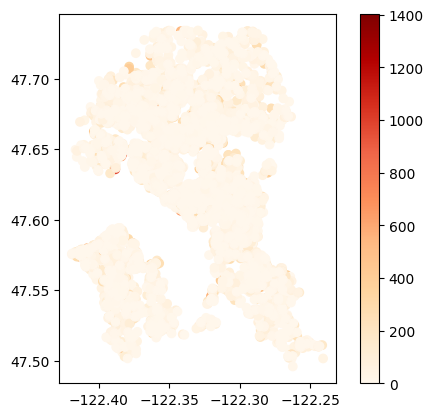

In [57]:
import geopandas as gpd

listings_gdf = gpd.GeoDataFrame(listings, geometry=gpd.points_from_xy(listings.longitude, listings.latitude))
listings_gdf.plot(column='number_of_reviews', cmap='OrRd', legend=True)

In [58]:
data=listings.columns.intersection(reviews.columns)
data

Index(['id'], dtype='object')

In [59]:
data_df = pd.merge(listings, reviews,left_on='id',right_on='listing_id', how='outer')
data_df.head()


,id_x,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,license,listing_id,id_y,date,reviewer_id,reviewer_name,comments,sentiments,compound_score,sentiment
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,$99.00,...,str-opli-19-002622,6606.0,5664.0,2009-07-17,18085.0,Vivian,"The Urban Cottage is comfortable, beautiful, f...","{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'comp...",0.9878,positive
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,$99.00,...,str-opli-19-002622,6606.0,338761.0,2011-06-27,434031.0,Elliott,Joyce was a wonderful host and the urban cotta...,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp...",0.9609,positive
2,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,$99.00,...,str-opli-19-002622,6606.0,467904.0,2011-08-22,976182.0,Allegra,Beautiful cottage and warm hospitality from Jo...,"{'neg': 0.057, 'neu': 0.656, 'pos': 0.287, 'co...",0.9753,positive
3,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,$99.00,...,str-opli-19-002622,6606.0,480017.0,2011-08-27,997921.0,Brittney,"Joyce is a wonderful host! She is warm, helpfu...","{'neg': 0.0, 'neu': 0.557, 'pos': 0.443, 'comp...",0.9652,positive
4,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,$99.00,...,str-opli-19-002622,6606.0,487278.0,2011-08-30,206901.0,Pascal,Joyce's cottage is the perfect Seattle locatio...,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.9285,positive


In [60]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482191 entries, 0 to 482190
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id_x                            482191 non-null  int64  
 1   name                            482191 non-null  object 
 2   host_id                         482191 non-null  int64  
 3   host_name                       482191 non-null  object 
 4   neighbourhood_group             482191 non-null  object 
 5   neighbourhood                   482191 non-null  object 
 6   latitude                        482191 non-null  float64
 7   longitude                       482191 non-null  float64
 8   room_type                       482191 non-null  object 
 9   price                           482191 non-null  object 
 10  minimum_nights                  482191 non-null  int64  
 11  number_of_reviews               482191 non-null  int64  
 12  last_review     

In [71]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
le = LabelEncoder()

object_to_int = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review', 'license', 'date', 'reviewer_name',
       'comments']


for obj_int in object_to_int:

    if data_df[obj_int].apply(lambda x: isinstance(x, dict)).any():

        data_df[obj_int] = data_df[obj_int].apply(lambda x: '' if isinstance(x, dict) else x)
    data_df[obj_int]  = le.fit_transform(data_df[obj_int])


float_columns = [ 'latitude', 'longitude', 'reviews_per_month']
scaler = StandardScaler()
for fl_col in float_columns:
    data_df[fl_col] = scaler.fit_transform(data_df[fl_col].values.reshape(-1, 1))


print(data_df.columns)


id_columns = ['id', 'id_y', 'reviewer_id']  # Update with correct names



data_df.info()

Index(['id_x', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'date',
       'reviewer_name', 'comments', 'sentiments', 'compound_score',
       'sentiment'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482191 entries, 0 to 482190
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id_x                            482191 non-null  int64  
 1   name                            482191 non-null  int64  
 2   host_id                         482191 non-null  int64  
 3   host_name                       482191 non-null  int64  
 4   neighbourhood_group             482191 non-null  int64  
 5   neig

In [74]:
from sklearn.model_selection import train_test_split
X = data_df.drop('price', axis=1)
y = data_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

for col in non_numeric_cols:
    X_train[col] = X_train[col].fillna('')
    X_test[col] = X_test[col].fillna('')

Non-numeric columns: Index(['sentiments', 'sentiment'], dtype='object')


In [80]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, classification_report
from xgboost import XGBRegressor

X_train = X_train.drop(['sentiments', 'sentiment'], axis=1)
X_test = X_test.drop(['sentiments', 'sentiment'], axis=1)

model = [XGBRegressor(enable_categorical=True)]
model_names = [type(fmodel).__name__ for fmodel in model]
mse_names = []

for fmodel in model:
    fmodel.fit(X_train, y_train)
    y_pred = fmodel.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    mse_names.append(mse)
    print(type(fmodel).__name__, 'mse:', mse)
    print('-'*50)

XGBRegressor mse: 1468.5988027772466
--------------------------------------------------


In [81]:
result = pd.DataFrame({
    'models': model_names,
    'mse': mse_names
})

best = pd.DataFrame(result.sort_values(by='mse', ascending=True))
best

,models,mse
0,XGBRegressor,1468.598803
